# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
data=pd.read_csv(r"credit (1).csv",encoding_errors="ignore")

# DATA UNDERSTANDING & EXPLORATORY DATA ANALYSIS

In [3]:
#To display the first five rows of the dataset
data.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
#To find the number of rows and columns in the dataset
data.shape

(100000, 28)

In [5]:
#To find the column names
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
#To get informations such as number of columns,column names,number of non-null cells in each column,datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [7]:
#To get statistical summary of numerical columns
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


# Visualization of the Dataset

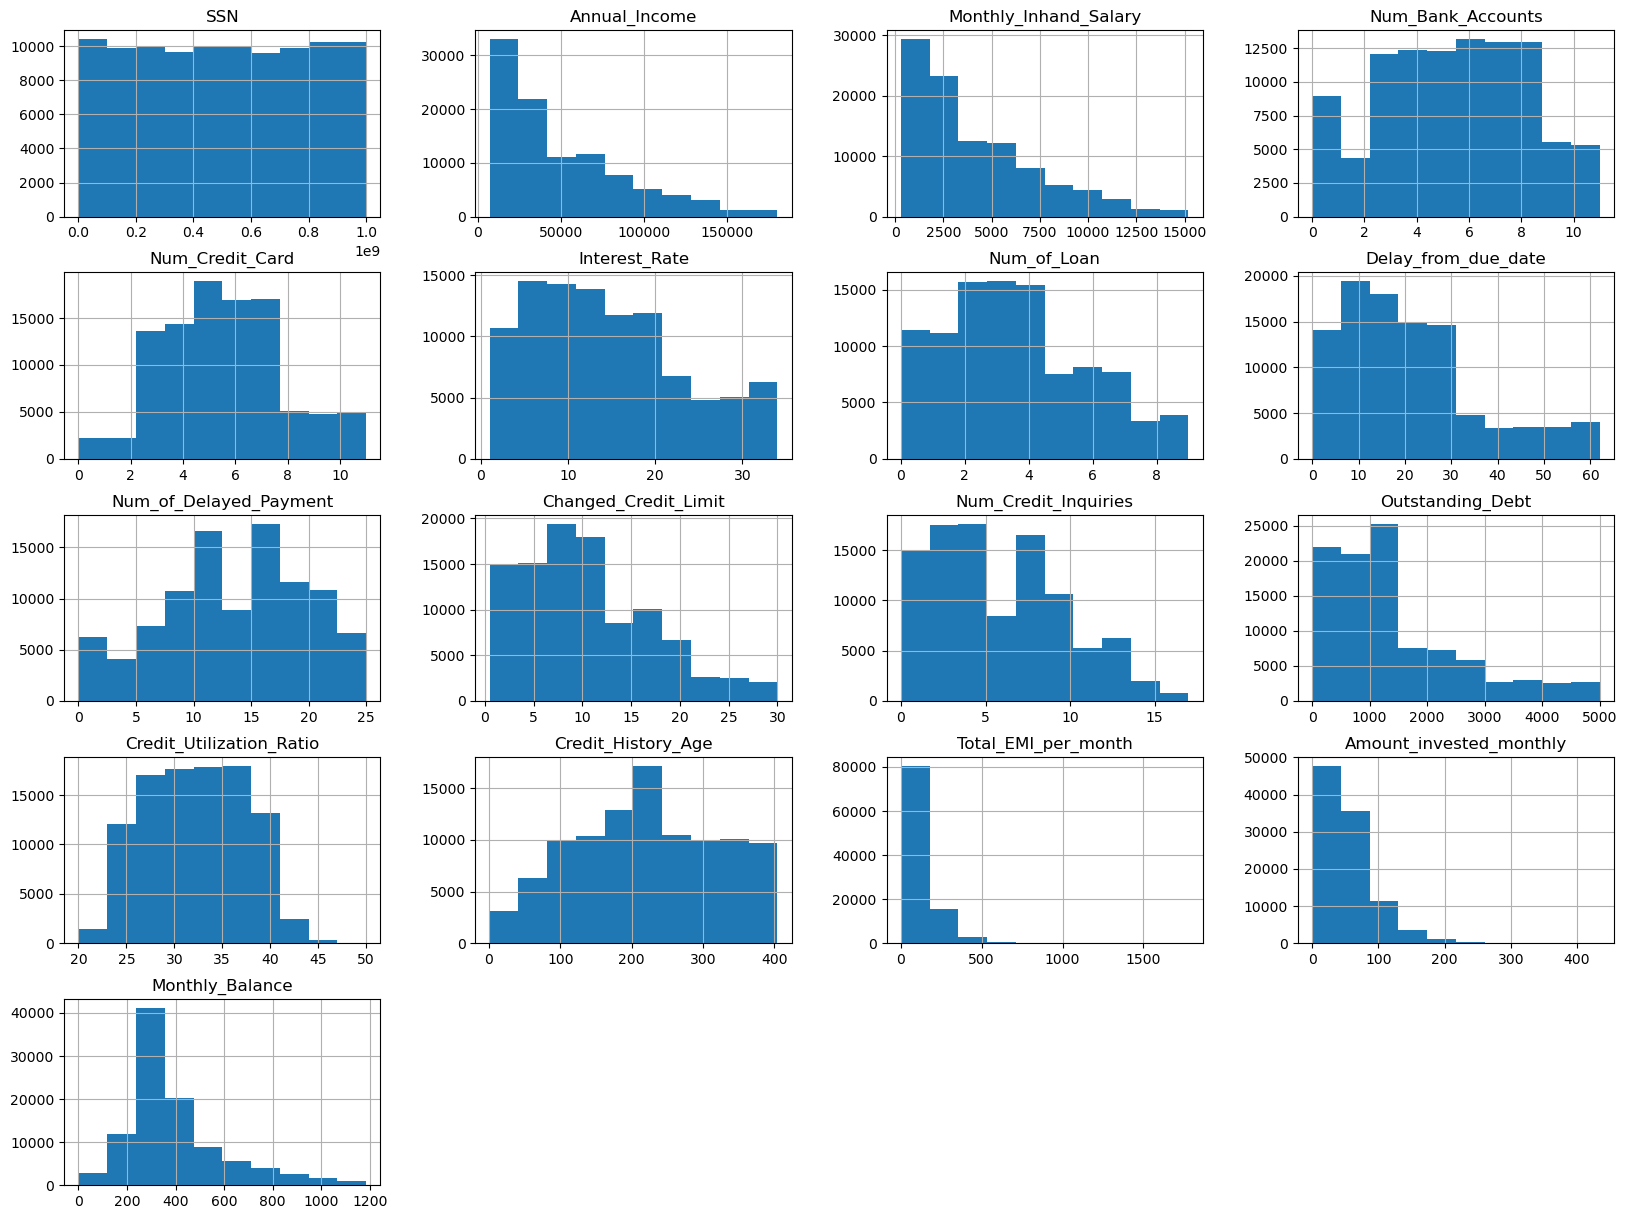

In [8]:
#Plotting histogram to analyse the distribution of some relevent numerical features
col=data[[ 'SSN','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Score']]
col.hist(figsize=(20,15))
plt.show()

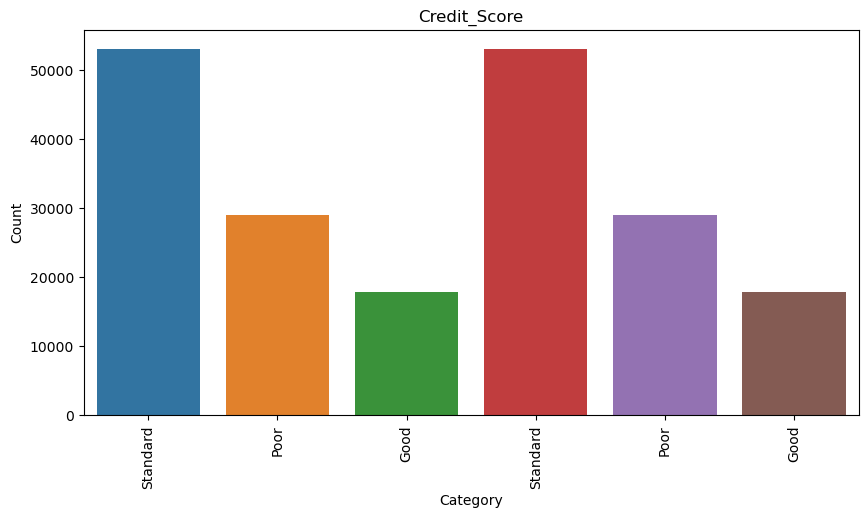

In [9]:
# Bar plot for Credit Score Distribution
plt.figure(figsize = (10,5))
a = data['Credit_Score'].value_counts(ascending = False)
order = list(a.index[:9]) + list(a.index[-14:])
sns.countplot(data = data, x = 'Credit_Score', order = order)
plt.xticks(rotation = 90);
plt.title('Credit_Score')
plt.ylabel('Count');
plt.xlabel('Category');

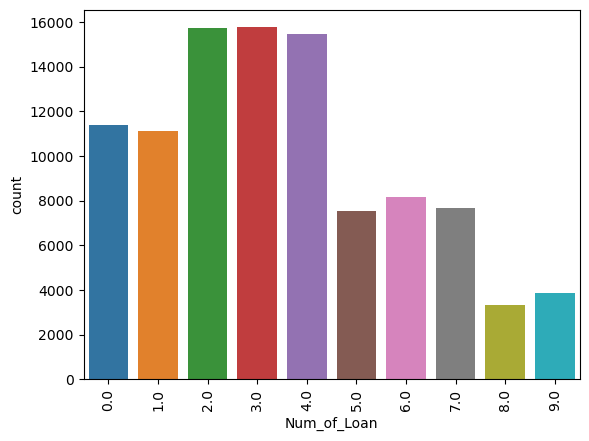

In [10]:
sns.countplot(x='Num_of_Loan',data=data)
plt.xticks(rotation=90)
plt.show()

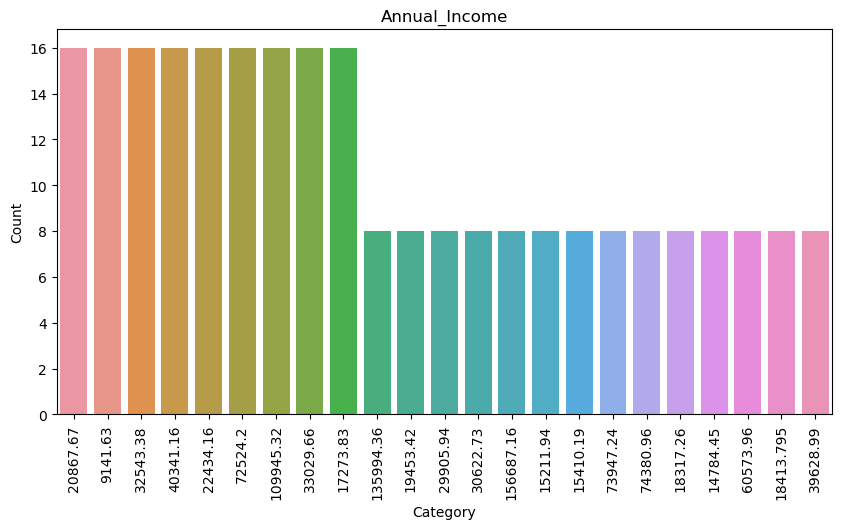

In [11]:
# Bar plot for Annual Income Distribution
plt.figure(figsize = (10,5))
a = data['Annual_Income'].value_counts(ascending = False)
order = list(a.index[:9]) + list(a.index[-14:])
sns.countplot(data = data, x = 'Annual_Income', order = order)
plt.xticks(rotation = 90);
plt.title('Annual_Income')
plt.ylabel('Count');
plt.xlabel('Category');

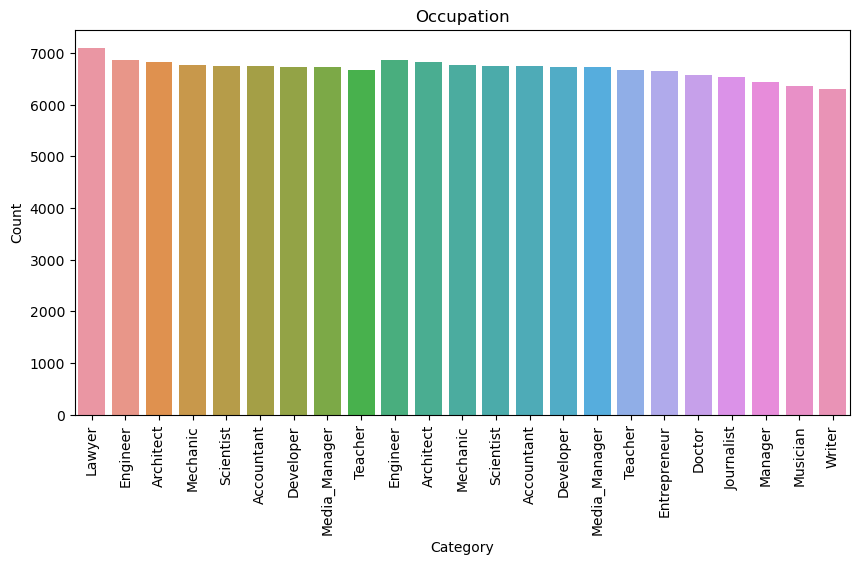

In [12]:
# Bar plot for Occupation Distribution
plt.figure(figsize = (10,5))
a = data['Occupation'].value_counts(ascending = False)
order = list(a.index[:9]) + list(a.index[-14:])
sns.countplot(data = data, x = 'Occupation', order = order)
plt.xticks(rotation = 90);
plt.title('Occupation')
plt.ylabel('Count');
plt.xlabel('Category');

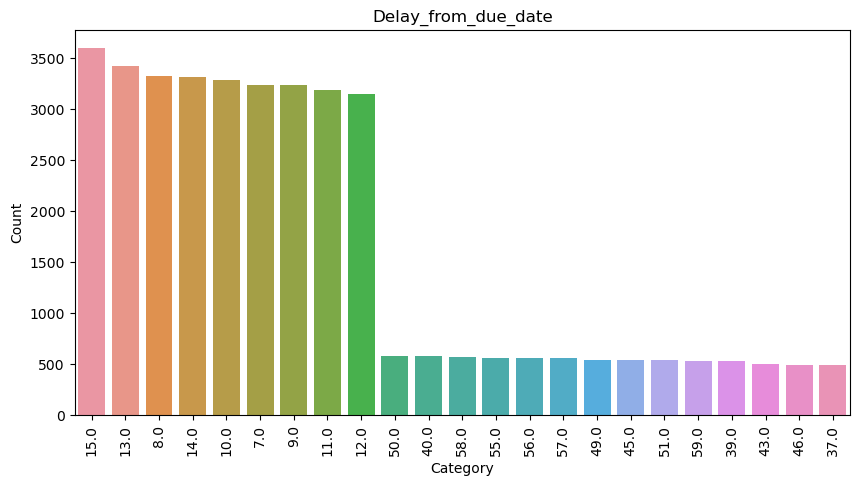

In [13]:
# Bar plot for Delay from due date Distribution
plt.figure(figsize = (10,5))
a = data['Delay_from_due_date'].value_counts(ascending = False)
order = list(a.index[:9]) + list(a.index[-14:])
sns.countplot(data = data, x = 'Delay_from_due_date', order = order)
plt.xticks(rotation = 90);
plt.title('Delay_from_due_date')
plt.ylabel('Count');
plt.xlabel('Category');

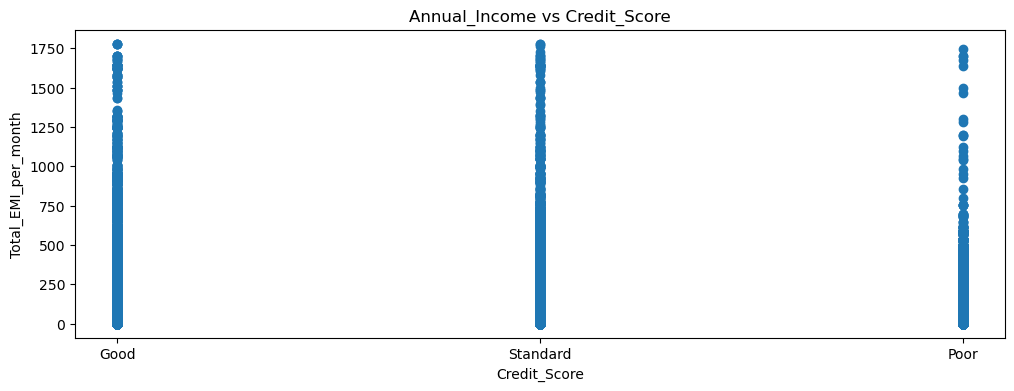

In [14]:
fig, ax = plt.subplots(1,figsize=(12, 4))
plt.scatter(x=data['Credit_Score'], y=data['Total_EMI_per_month'])
ax.set(title='Annual_Income vs Credit_Score', xlabel='Credit_Score', ylabel='Total_EMI_per_month')
plt.show()


# Distribution of Age by Credit Score

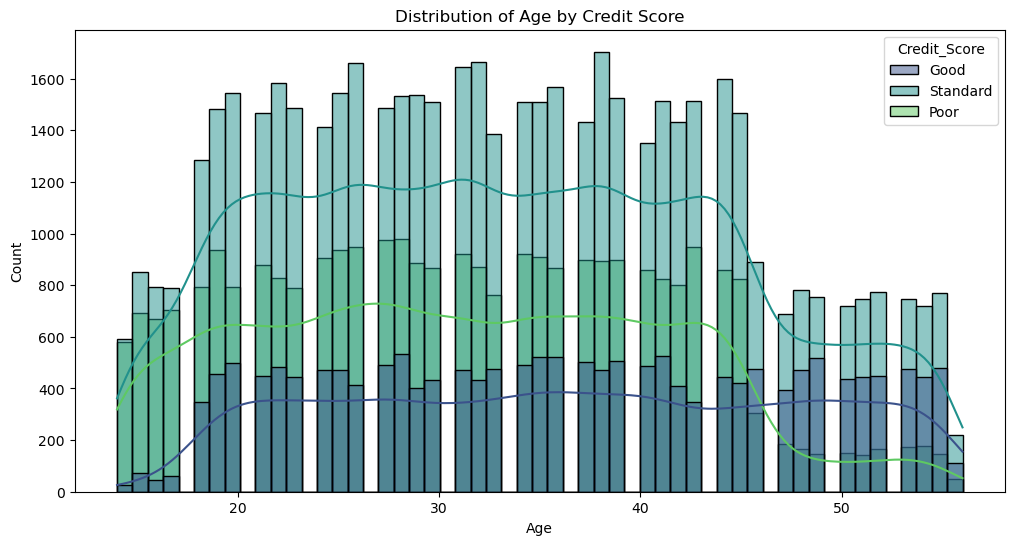

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data, x='Age', hue='Credit_Score', kde=True, palette='viridis')
plt.title('Distribution of Age by Credit Score')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Credit Score Distribution by Occupation

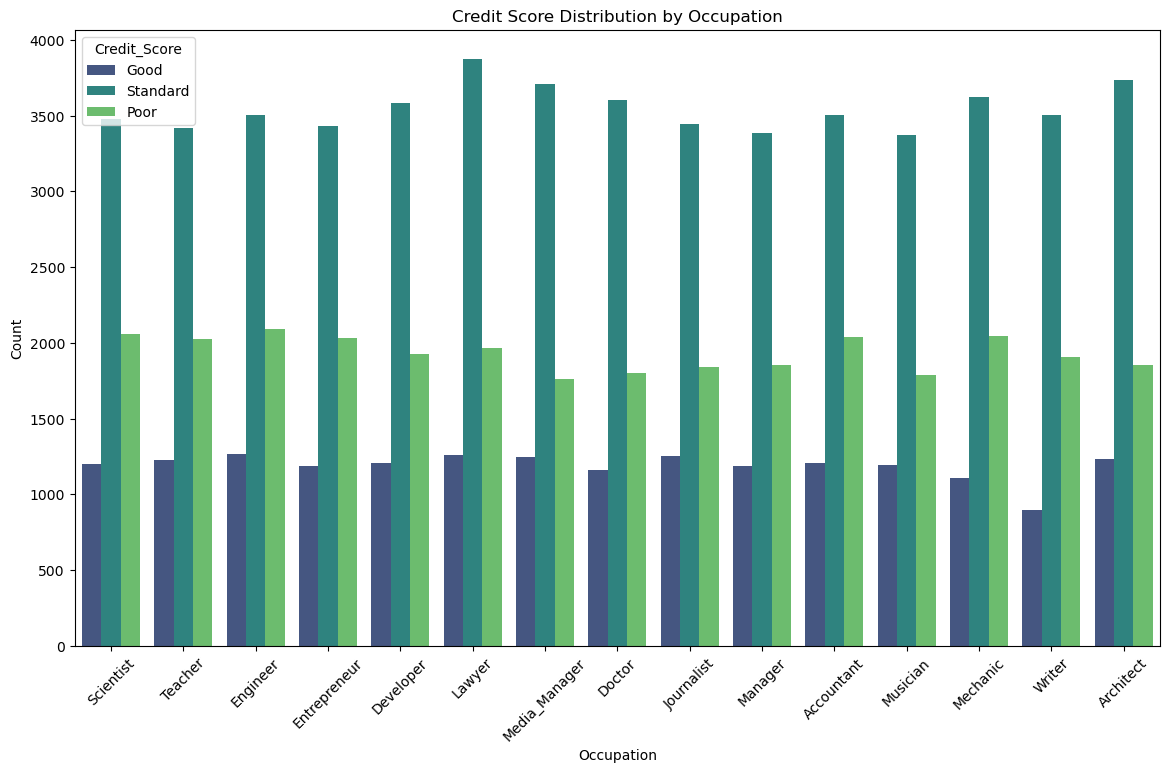

In [16]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='Occupation', hue='Credit_Score', palette='viridis')
plt.title('Credit Score Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Payment Behavior Distribution by Credit Score

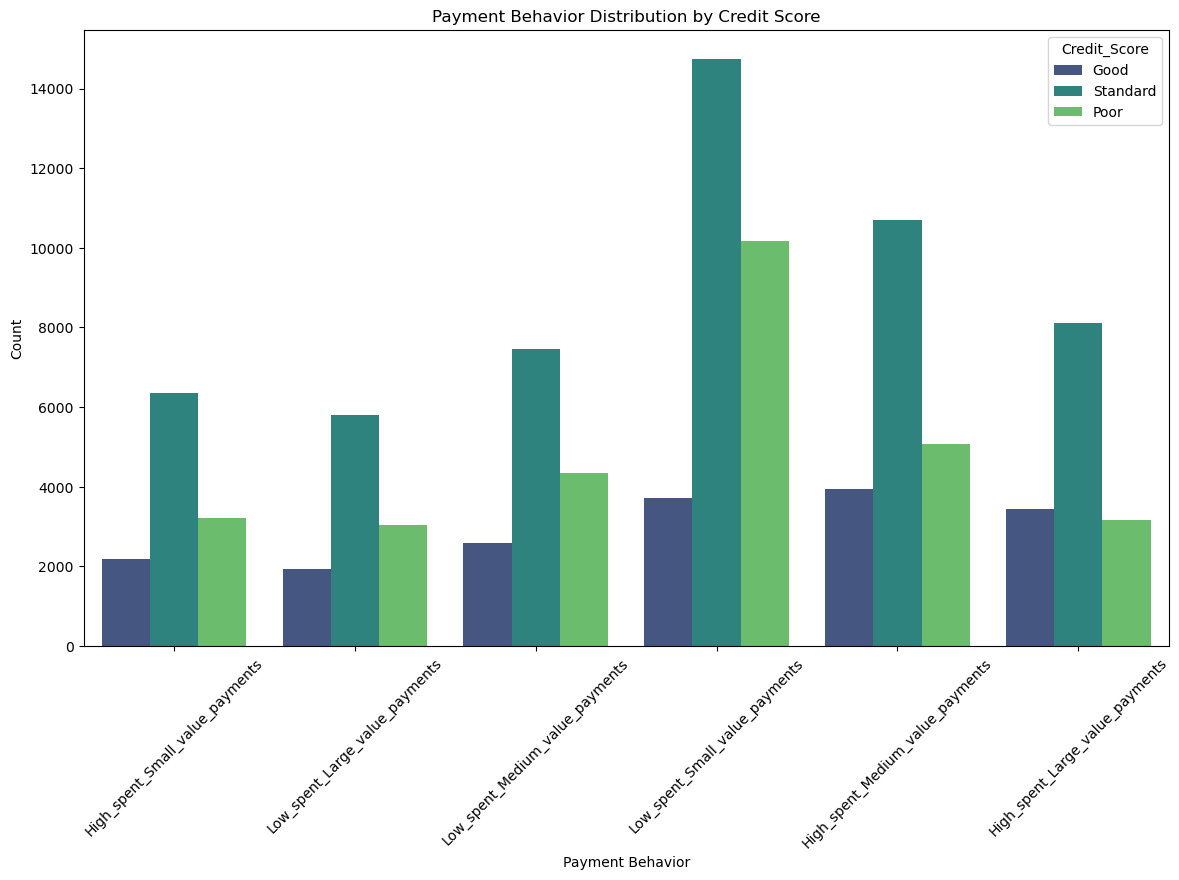

In [17]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='Payment_Behaviour', hue='Credit_Score', palette='viridis')
plt.title('Payment Behavior Distribution by Credit Score')
plt.xlabel('Payment Behavior')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Checking Correlation

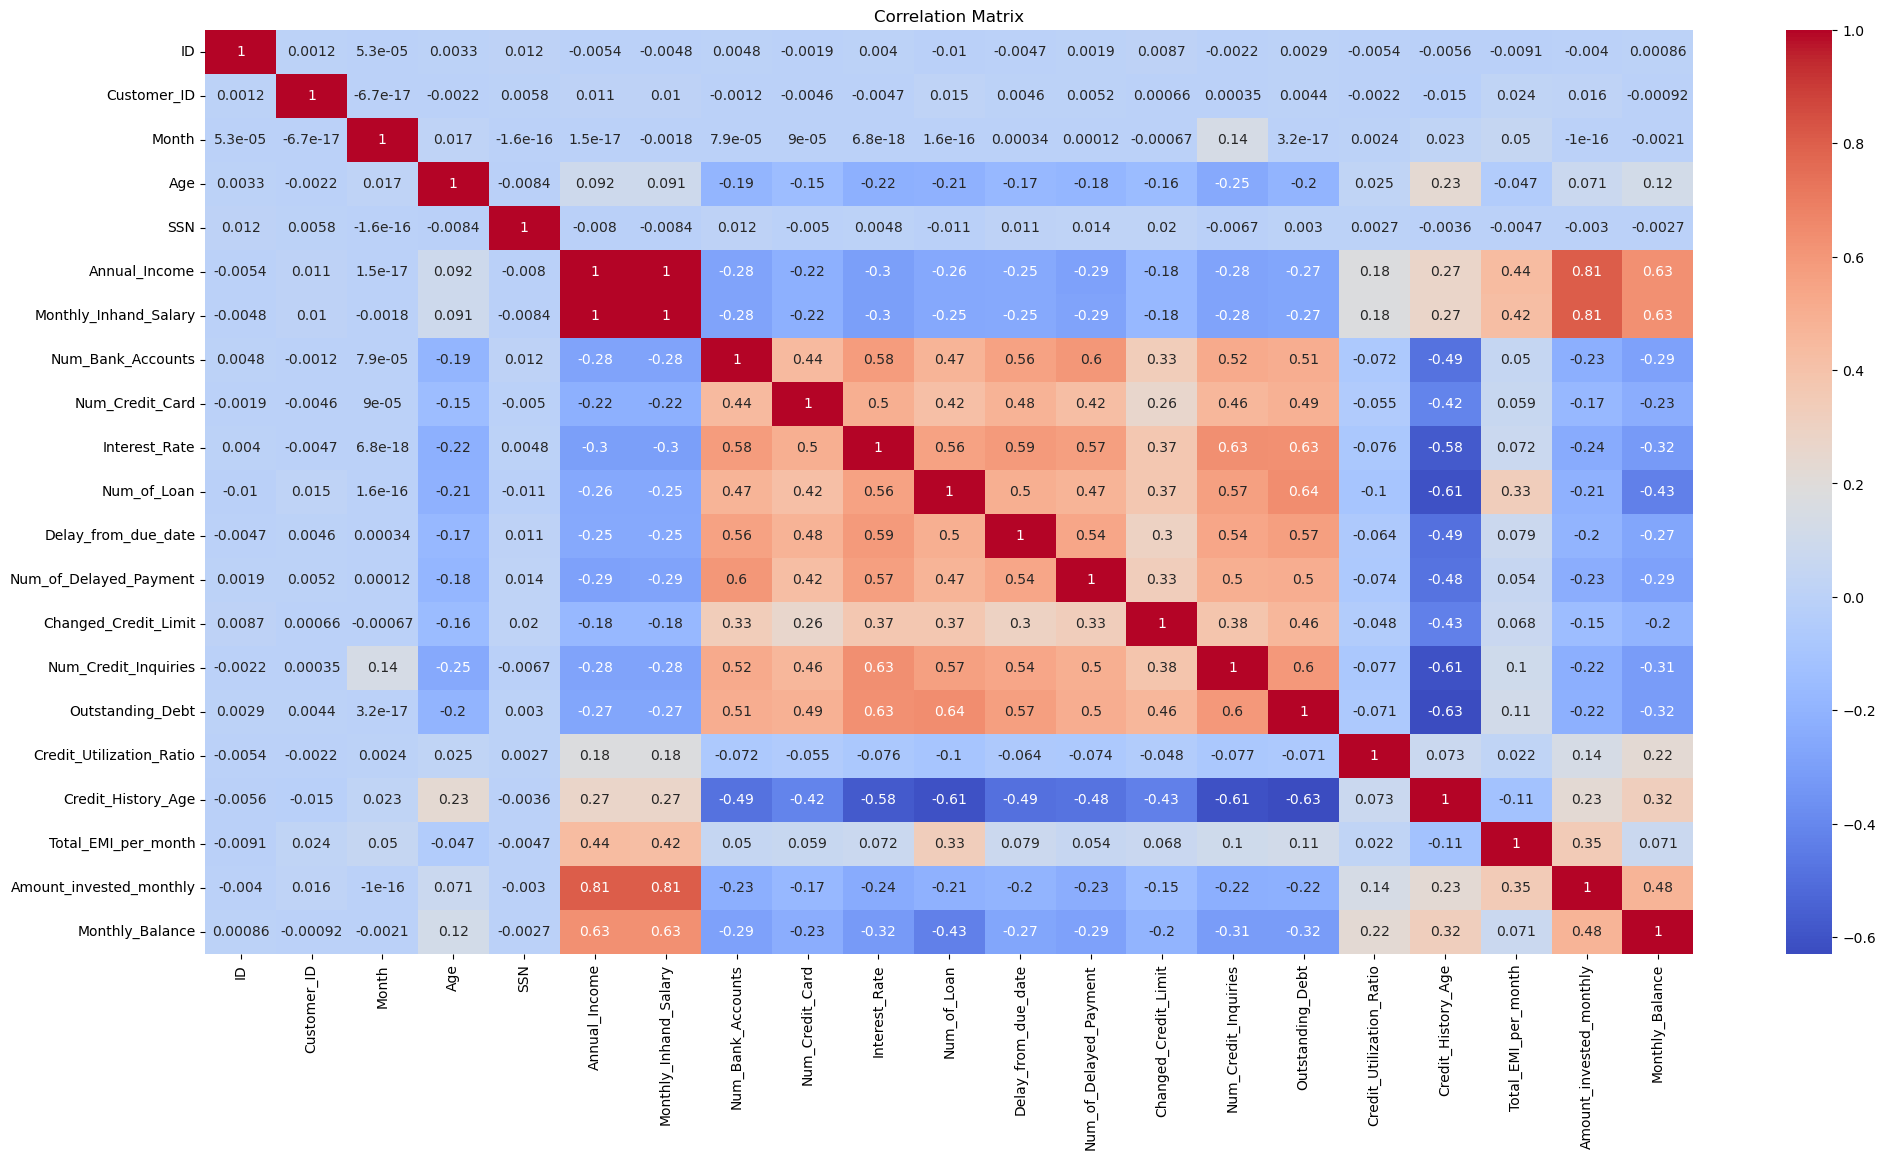

In [18]:
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# DATA PREPROCESSING

# Missing Value Detection

In [19]:
#Checking for null values
data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

# Outlier Detection

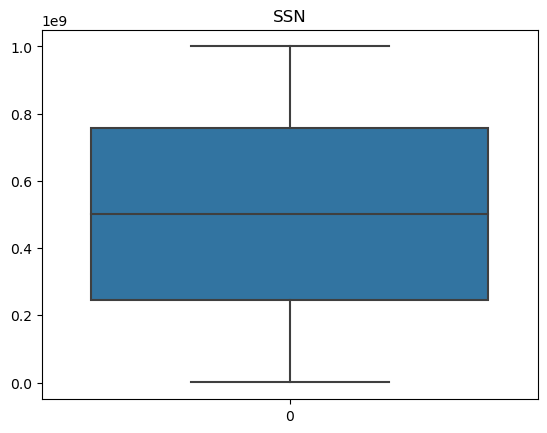

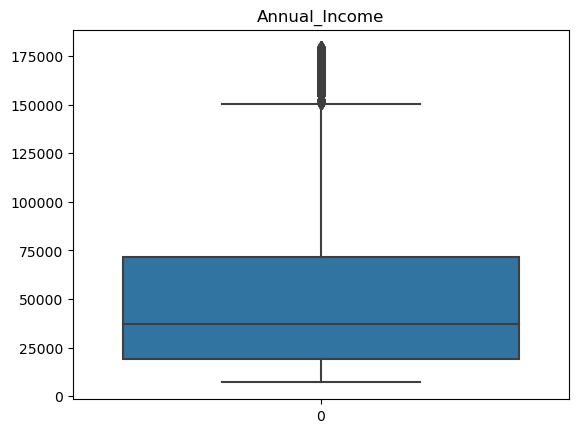

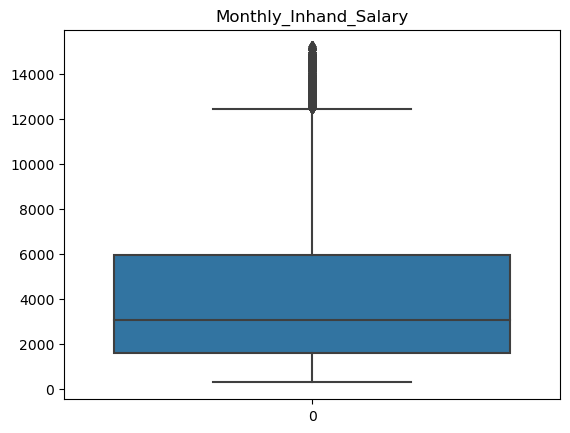

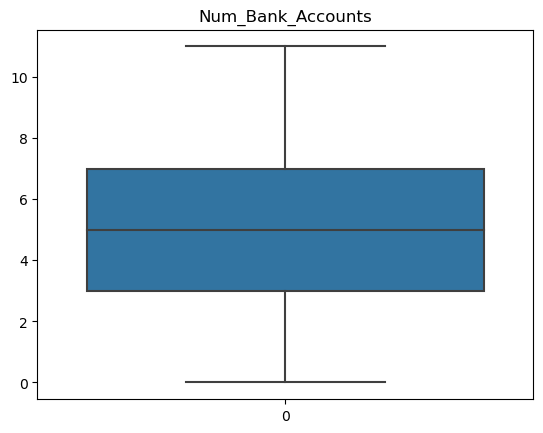

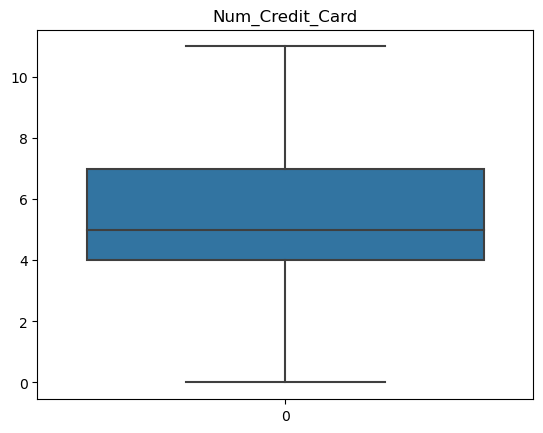

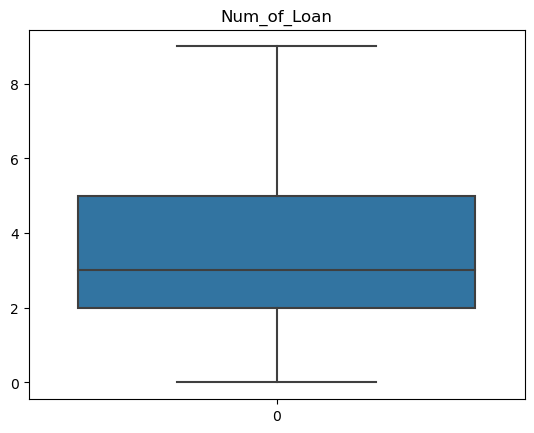

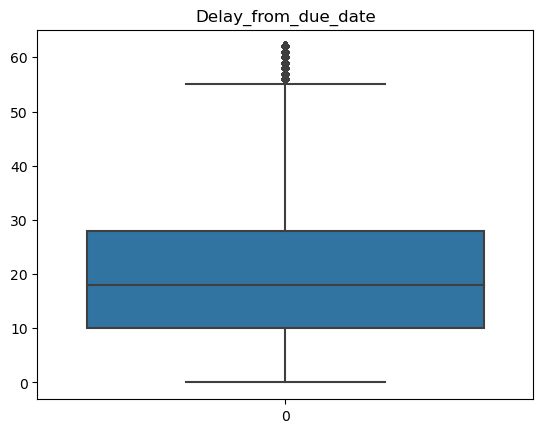

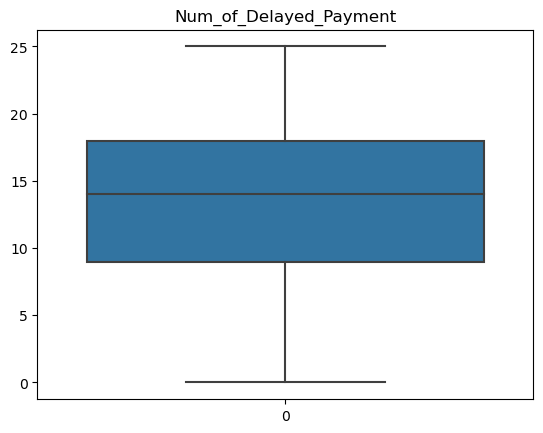

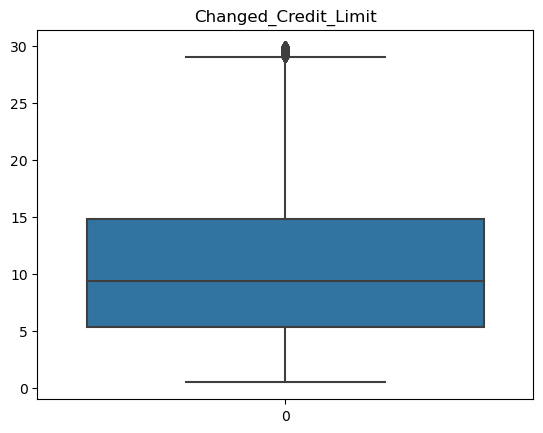

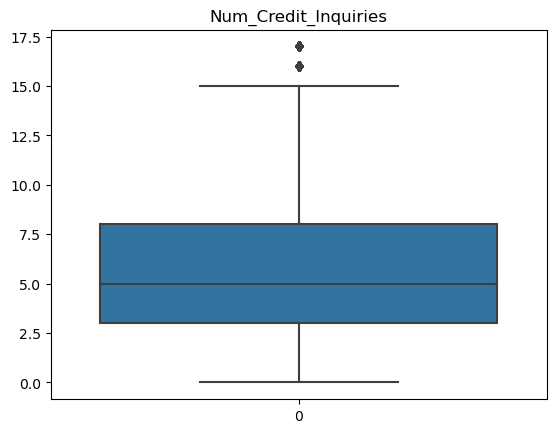

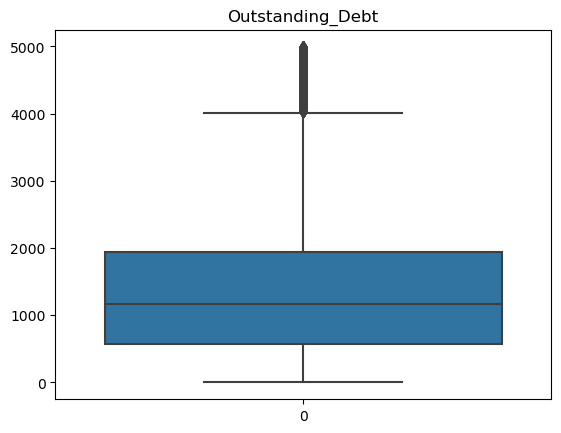

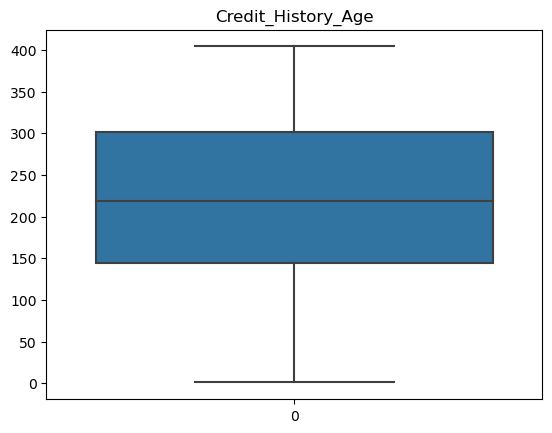

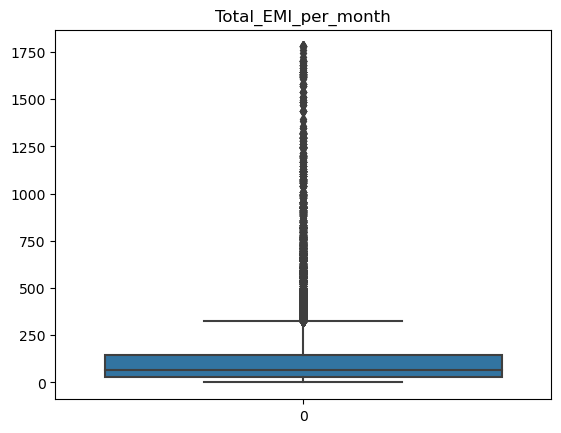

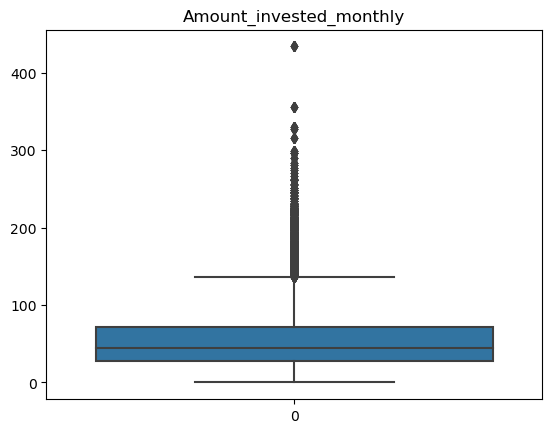

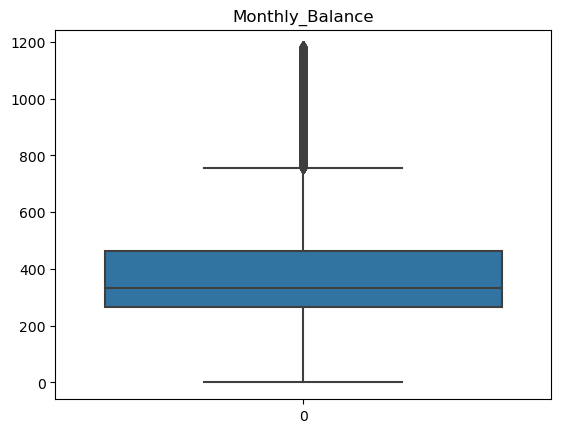

In [20]:
col=[ 'SSN','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_History_Age', 'Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance']
for i in col:
    plt.figure()
    sns.boxplot(data[i])
    plt.title(i)
plt.show()

In [21]:
data.drop(['Customer_ID', 'Name'],inplace=True,axis=1 )

In [22]:
### Balancing - Occupation
occupation_count = data['Occupation'].value_counts(dropna = False)
occupation_count

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

# Normalization

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
col_float = ['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
             'Outstanding_Debt', 'Credit_History_Age', 'Total_EMI_per_month', 'Monthly_Balance']

# Assuming 'data' is your DataFrame
for i in col_float:
    data[i] = scaler.fit_transform(data[[i]])

data.head()

,ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,1,0.214286,821000265.0,Scientist,0.069997,1824.843333,3.0,4.0,3.0,...,Good,0.16202,26.822620,0.655087,No,0.027865,21.46538,High_spent_Small_value_payments,0.263941,Good
1,5635,2,0.214286,821000265.0,Scientist,0.069997,1824.843333,3.0,4.0,3.0,...,Good,0.16202,31.944960,0.657568,No,0.027865,21.46538,Low_spent_Large_value_payments,0.240405,Good
2,5636,3,0.214286,821000265.0,Scientist,0.069997,1824.843333,3.0,4.0,3.0,...,Good,0.16202,28.609352,0.660050,No,0.027865,21.46538,Low_spent_Medium_value_payments,0.279750,Good
3,5637,4,0.214286,821000265.0,Scientist,0.069997,1824.843333,3.0,4.0,3.0,...,Good,0.16202,31.377862,0.662531,No,0.027865,21.46538,Low_spent_Small_value_payments,0.188731,Good
4,5638,5,0.214286,821000265.0,Scientist,0.069997,1824.843333,3.0,4.0,3.0,...,Good,0.16202,24.797347,0.665012,No,0.027865,21.46538,High_spent_Medium_value_payments,0.288432,Good


# Encoding

In [26]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label_encoders={}
to_encode=['ID', 'Month', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score']
for col in to_encode:
    data[col]=le.fit_transform(data[col])
    label_encoders[col]=dict(zip(le.classes_,le.transform(le.classes_)))

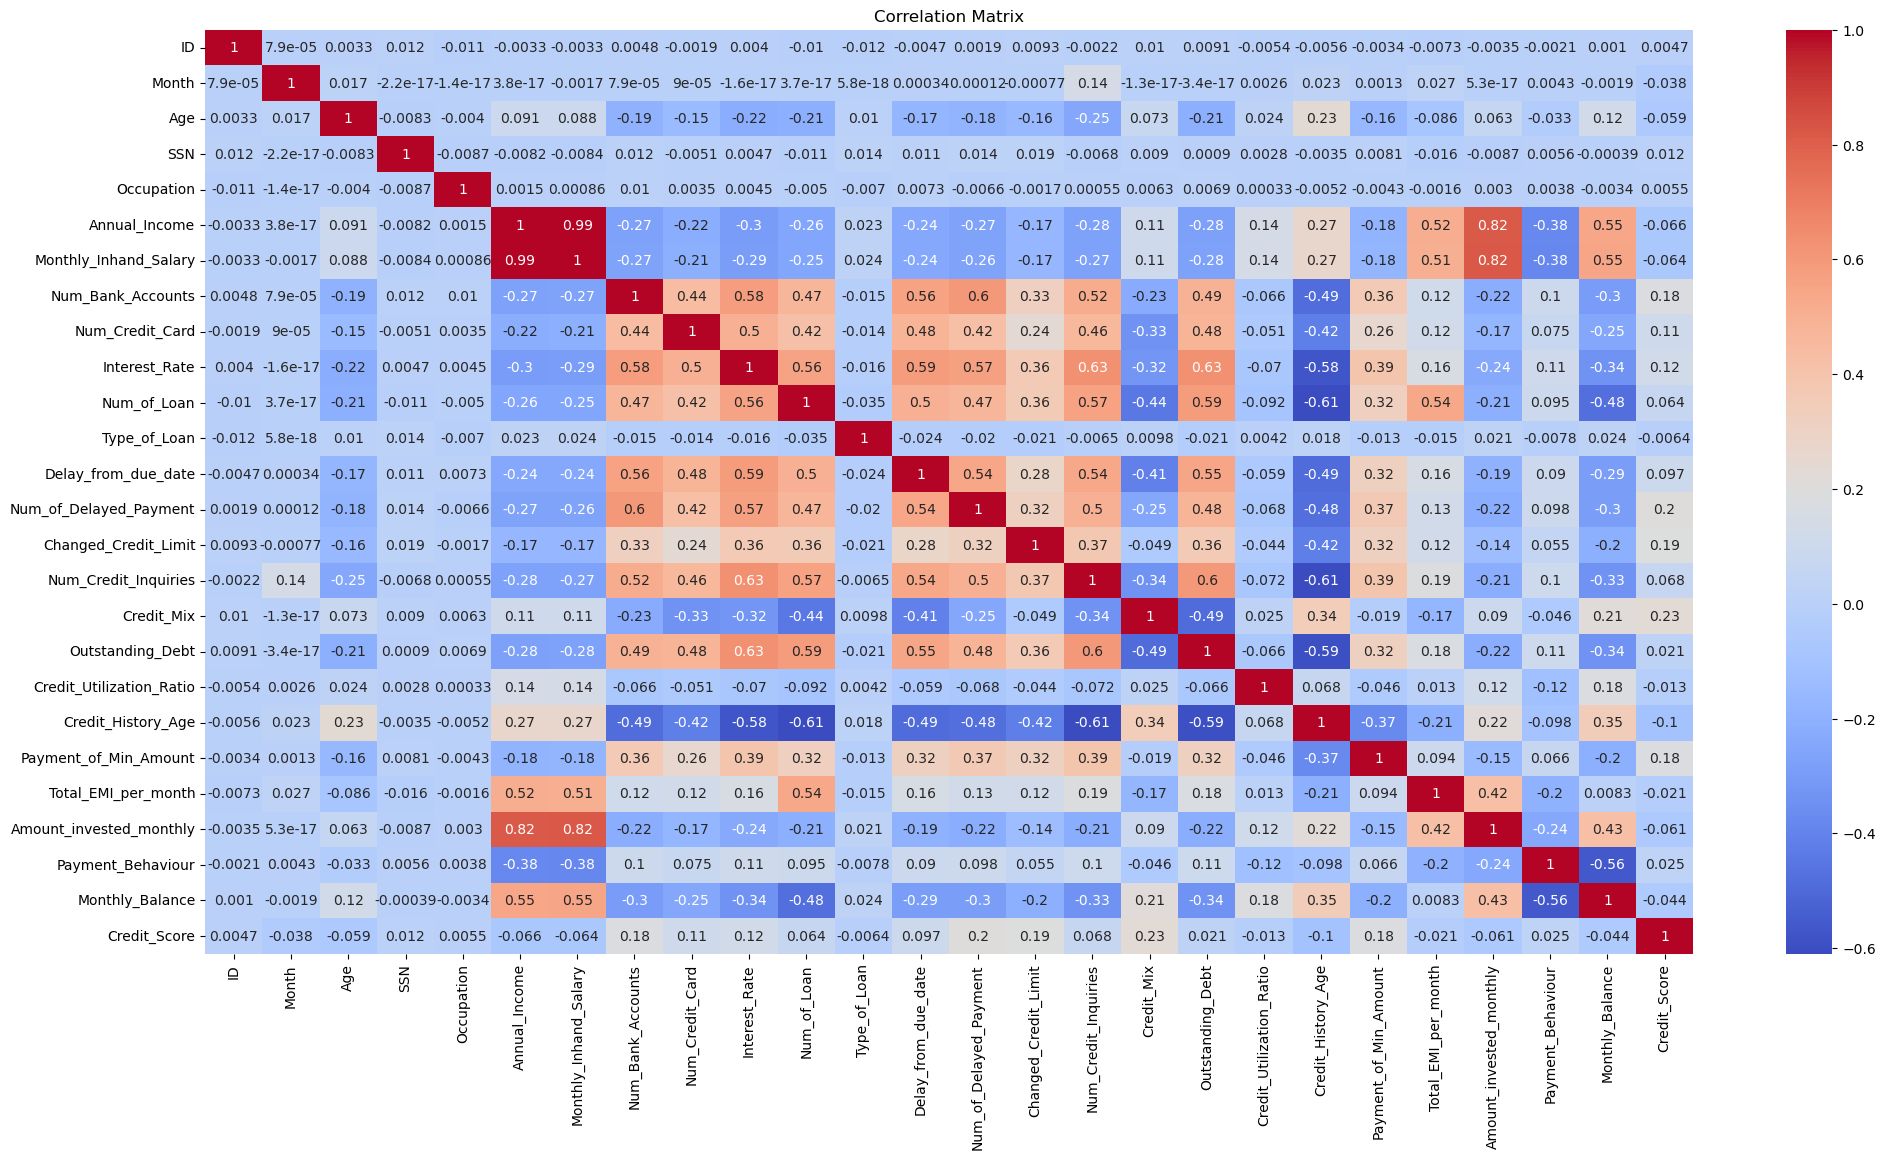

In [27]:
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [28]:
#Finding highly correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [29]:
corr_features = correlation(data, 0.6)
len(set(corr_features))

5

In [30]:
corr_features

{'Amount_invested_monthly',
 'Monthly_Inhand_Salary',
 'Num_Credit_Inquiries',
 'Num_of_Delayed_Payment',
 'Outstanding_Debt'}

In [31]:
x=data.drop(['Credit_Score'],axis=1)
y=data['Credit_Score']

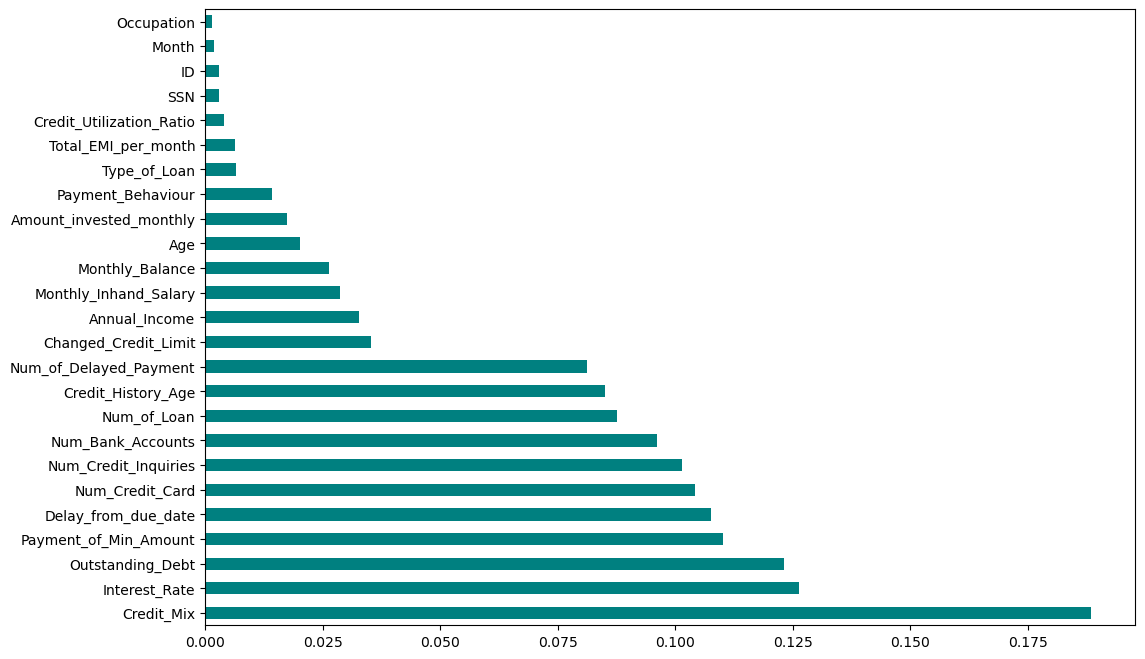

In [32]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(x,y)
feat_importances=pd.Series(importances,data.columns[0:len(data.columns)-1]).sort_values(ascending=False)
plt.figure(figsize = (12,8))
feat_importances.plot(kind='barh',color='teal')
plt.show()

# BUILDING CLASSIFICATION MODELS

# Defining the dependent and independent variables

In [33]:
x=data[['ID', 'Month', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']]
y=data['Credit_Score']

In [34]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X=std_scaler.fit_transform(x)
X=pd.DataFrame(x)


# Splitting the data into train data and test data

In [35]:
#Splitting the data in such a way that 80% data is for training and 25% is for testing
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)